 **Recommended video :**
 **[Regression: Crash Course Statistics](https://www.youtube.com/watch?v=WWqE7YHR4Jc)**


# Simple Linear Regression

### Understanding Simple Linear Regression: A Clear Path to Predictions  

Imagine you’re a researcher investigating how study hours influence test scores. You gather data, plot it, and notice a trend: the more hours studied, the higher the score. But how do you quantify this relationship? Enter **simple linear regression**, a powerful tool for uncovering patterns and making predictions.  

---

### The Foundation: A Straightforward Formula  

At the heart of simple linear regression lies the equation:  

$$  
y = a + bx  
$$  

Here’s what each term means:  

- \( y \): The dependent variable (e.g., test scores).  
- \( a \): The intercept, or the starting point of \( y \) when \( x \) is zero.  
- \( b \): The slope, which shows how much \( y \) changes with every one-unit change in \( x \).  
- \( x \): The independent variable (e.g., study hours).  

This formula represents a straight line, the simplest way to describe how \( x \) and \( y \) interact.  


![Linear Regression Illustration](https://drive.google.com/uc?export=view&id=1i5TqYmw_AaG6LGtRYwZHvOLqCStMVa-b)


---

### The Reality of Data: Introducing Variability  

In real-world scenarios, data points rarely fall perfectly along a straight line. There’s often some variability—those small deviations from the line we call **errors** or **residuals**.  

To account for this, we refine the formula:  

$$  
\hat{y} = \beta_0 + \beta_1 X_1 + \varepsilon_i  
$$  

Here’s the breakdown:  

- $( \hat{y} )$: The predicted value of the dependent variable.  
- $( \beta_0 )$: The intercept (similar to $( a )$.  
- $( \beta_1 )$: The slope (similar to $( b )$.  
- $( X_1 )$: The independent variable.  
- $( \varepsilon_i )$: The residual, capturing the difference between observed and predicted values.  

---

### Understanding Residuals  

Residuals $( e_i )$ help measure the accuracy of our model. They represent the gap between the actual and predicted values:  

$$  
e_i = y_i - \hat{y}_i  
$$  

The goal is to make these residuals as small as possible, ensuring the model closely reflects reality.  

---

### Minimizing Errors: The Least-Squares Method  

To fine-tune the line, the **least-squares method** minimizes the sum of squared residuals:  

$$  
e_1^2 + e_2^2 + \dots + e_i^2  
$$  

By squaring the residuals, we avoid the issue of positive and negative errors canceling out, and we focus on reducing overall variability.  

---

### Assumptions Behind the Model  

For the regression model to work effectively, a few key assumptions must hold:  

1. **Linearity**: The relationship between \( x \) and \( y \) should be a straight line.  
2. **Residual Sum**: Residuals should sum to zero:  
   $$  
   \sum_{i=1}^n e_i = 0  
   $$  
3. **Error Minimization**: The model should minimize the sum of squared residuals for accuracy.  

---

### Why It Matters  

Simple linear regression provides a clear way to understand and predict relationships. Whether you’re studying test scores, sales growth, or even weather patterns, this method translates raw data into actionable insights.  


This isn’t just about numbers—it’s about uncovering stories in the data and making informed decisions. Ready to explore further?  Let look at an example



### Example : Predicting Future Temperatures and Estimating Past Temperatures  

Imagine you’re a climate researcher analyzing a city’s temperature trends over the last decade. Each year, you record the average annual temperature and notice a gradual increase. Now, you’re faced with two exciting questions:  

1. Can you predict the city’s temperature for the next year?  
2. Can you estimate what the temperature might have been 15 years ago, even without historical data?  

This is where **simple linear regression** shines. By analyzing the relationship between time (independent variable) and average temperature (dependent variable), you can fit a line that tells a story about past and future trends.  

With Python, we can tackle this challenge step by step:  

1. **Collect Data**: Use existing records of yearly average temperatures.  
2. **Visualize**: Plot the data to identify patterns and trends.  
3. **Build the Model**: Fit a simple linear regression model to the data.  
4. **Make Predictions**: Use the model to estimate temperatures for both future and past years.  

By the end of this exercise, you’ll not only have a clear prediction but also an intuitive understanding of how simple linear regression works in practice. Let’s dive in and explore how Python can bring this analysis to life!

### Importing Necessary Libraries

In [ ]:
%matplotlib inline
import pandas as pd

### Loading the Average High Temperatures into a `DataFrame`

In [ ]:
# Import Data Files from Google Drive


import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1bKeWaUP-y6S3Of493W4gt1mZzqI0n0Ud/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

In [ ]:
df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [ ]:
# nyc = pd.read_csv('sample_data/ave_hi_nyc_jan_1895-2018.csv')

In [ ]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [ ]:
nyc.Date = nyc.Date.floordiv(100)

In [ ]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Splitting the Data for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
     random_state=11)

In [ ]:
X_train.shape

(93, 1)

In [ ]:
X_test.shape

(31, 1)

### Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regression = LinearRegression()

In [ ]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [ ]:
linear_regression.coef_

array([0.01939167])

In [ ]:
linear_regression.intercept_

-0.30779820252657686

### Testing the Model

In [ ]:
predicted = linear_regression.predict(X_test)

In [ ]:
expected = y_test

In [ ]:
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Predicting Future Temperatures and Estimating Past Temperatures

In [ ]:
predict = (lambda x: linear_regression.coef_ * x +
                      linear_regression.intercept_)

In [ ]:
predict(2019)

array([38.84399018])

In [ ]:
predict(1890)

array([36.34246432])

### Visualizing the Dataset with the Regression Line

In [ ]:
import seaborn as sns

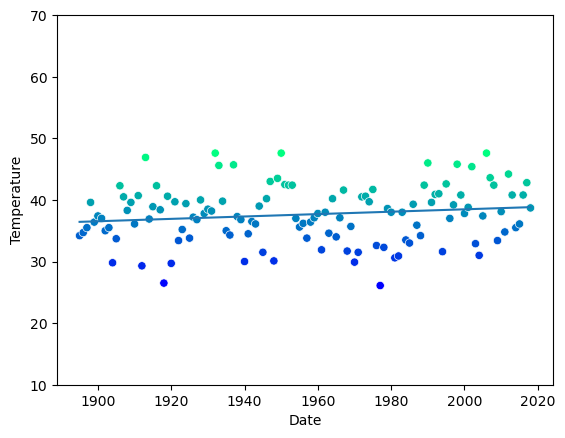

In [ ]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt

line = plt.plot(x, y)

In [ ]:
predict(1889)

array([36.32307265])

In [ ]:
predict(2024)

array([38.94094855])

## Introducing Regression Evaluation Metrics
===============

When building a machine learning model, it's essential to evaluate its performance. Evaluation metrics help us understand how well our model is doing. In this notebook, lets explore the most common evaluation metrics used in regression problems.

### Mean Squared Error (MSE)
-----------------------------

MSE measures the average squared difference between predicted and actual values. It's a popular metric for regression problems.

*   **Formula:** $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{true} - y_{pred})^2$$


*   **Low MSE**: The model is making accurate predictions.
*   **High MSE**: The model is making inaccurate predictions.

### Mean Absolute Error (MAE)
--------------------------------

MAE measures the average absolute difference between predicted and actual values. It's similar to MSE, but it uses absolute differences instead of squared differences.

*   **Formula:** $$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{true} - y_{pred}|$$

*   **Low MAE**: The model is making accurate predictions.
*   **High MAE**: The model is making inaccurate predictions.

### R-Squared (R2)
-------------------

R2 measures the proportion of variance in the dependent variable that is predictable from the independent variable(s). It's a popular metric for regression problems.

*   **Formula:** $$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{true} - y_{pred})^2}{\sum_{i=1}^{n} (y_{true} - \bar{y})^2}$$

*   **High R2**: The model is explaining most of the variance in the data.
*   **Low R2**: The model is not explaining much of the variance in the data.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-Squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 17.31
Mean Absolute Error (MAE): 3.45
R-Squared (R2): -0.03


Let's break down the given scores:


*   **Mean Squared Error (MSE): 17.31**: This means that, on average, our temperature predictions are about 4.16°C (square root of 17.31) away from the actual temperatures. This is a relatively high MSE, indicating that our model is not making very accurate temperature predictions.


*   **Mean Absolute Error (MAE): 3.45**: This means that, on average, our temperature predictions are about 3.45°C away from the actual temperatures. This is a relatively moderate MAE, indicating that our model is making somewhat accurate temperature predictions.


*   **R-Squared (R2): -0.03**: This means that our model is explaining almost none of the variance in the temperature data. In fact, the R2 value is slightly negative, indicating that our model is actually doing worse than a simple baseline model that just predicts the mean temperature. This is a very low R2, indicating that our model is not doing a good job of capturing the patterns and trends in the temperature data.

### Conclusion
This notebook demonstrates the application of simple linear regression to analyze NYC temperature trends over time. By preprocessing the data and employing regression modeling, we estimated the relationship between the year and average temperature. Visualizations highlight the increasing temperature trend, reflecting broader climatic shifts. We looked at evaluation metrics for regression problems and highlighted how important they are when building machine learning models

Key takeaways:
- **Data Visualization:** Scatter plots effectively display trends and the impact of independent variables.
- **Model Insights:** The regression model provides temperature predictions for specific years (e.g., 1889 and 2024), showcasing its utility in forecasting.
- **Climate Implications:** The observed trend aligns with growing global concerns about climate change.

This analysis underscores the power of regression in understanding and predicting time-dependent phenomena. Future steps could include using more advanced models and incorporating additional variables to enhance prediction accuracy.

---